# **Disaster Tweets Classifier EDA**

## Read training set

In [13]:
import pandas as pd

df = pd.read_csv("data/train.csv")
print(df.head(10))

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1  


## Check for missing values

In [7]:
print(df.isnull().sum() / len(df) * 100)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


## Location and keywords analysis

### Location analysis

In [8]:
df.groupby(['location', 'target']).size().unstack(fill_value=0)

target,0,1
location,,
,0,1
Glasgow,1,0
"Melbourne, Australia",1,0
News,0,1
å_,1,0
...,...,...
å_: ?? ÌÑ ? : ?,1,0
å_å_Los Mina Cityã¢,1,0
å¡å¡Midwest Û¢Û¢,1,0


### Keyword analysis

In [9]:
df.groupby(['keyword', 'target']).size().unstack(fill_value=0)

target,0,1
keyword,,
ablaze,23,13
accident,11,24
aftershock,34,0
airplane%20accident,5,30
ambulance,18,20
...,...,...
wounded,11,26
wounds,23,10
wreck,30,7


## Sentiment and text length analysis

### Text length analysis

In [26]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df.groupby('target')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4342.0,14.704744,6.161564,1.0,10.0,15.0,19.0,31.0
1,3271.0,15.167533,5.096806,2.0,11.0,15.0,19.0,30.0


### Sentiment analysis

In [27]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.groupby('target')['sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4342.0,0.070622,0.283414,-1.0,0.0,0.0,0.179643,1.0
1,3271.0,0.018631,0.239165,-1.0,0.0,0.0,0.062500,1.0


## Correlation between features

In [21]:
df['location_missing'] = df['location'].isnull()
pd.crosstab(df['location_missing'], df['target'])

target,0,1
location_missing,,
False,2884,2196
True,1458,1075


In [20]:
df['keyword_missing'] = df['keyword'].isnull()
pd.crosstab(df['keyword_missing'], df['target'])

target,0,1
keyword_missing,,
False,4323,3229
True,19,42


## Visualizations

### Perform label encoding on text features

In [23]:
from sklearn.preprocessing import LabelEncoder

le_location = LabelEncoder()
le_keyword = LabelEncoder()

df['location_encoded'] = le_location.fit_transform(df['location'].fillna('missing'))
df['keyword_encoded'] = le_keyword.fit_transform(df['keyword'].fillna('missing'))

### Visualize data to uncover trends and patterns

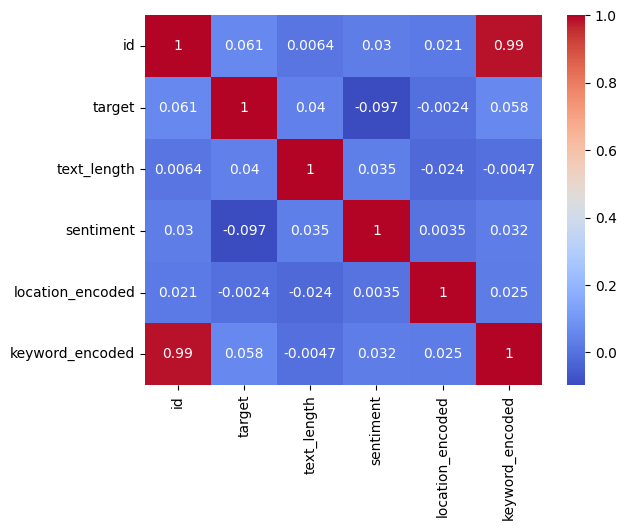

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Conclusions

### Feature Relevance

The analysis of location feature indicates that its presence or absence does not significantly correlate with whether a tweet is about a disaster. This suggests that this feature may not provide substantial predictive power for the classification task. The analysis of keyword feature suggests that keywords could serve as valuable features in the classification model.

### Text Length Insights

The text length analysis shows that there is no meaningful difference in average text length between disaster and non-disaster tweets. Thus, text length may not be a relevant feature for distinguishing between the two classes.

### Sentiment Analysis

The sentiment scores show a slight negative correlation with the target variable. While this suggests some potential relationship, the correlation is weak and may not be strong enough to rely on sentiment as a primary feature for classification.

### Need for Advanced Feature Extraction

Given the limitations of the current features, it may be beneficial to explore advanced text feature extraction techniques, such as using BERT embeddings or other language models. These methods can capture more nuanced semantic meanings and context in the tweets, which may improve model performance.

### Data Cleaning Importance

Observations from location and keyword analyses indicate that cleaning the data is essential. Removing irrelevant or malformed entries, handling missing values, and standardizing text (e.g., converting to lowercase, removing punctuation) are crucial steps to enhance the quality of the dataset.

### Focus on Other Features

Future analyses should consider additional features or transformations that may capture the nuances of the data better. Textual content analysis or additional metadata could provide valuable insights into the classification task.